In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# Decision tree - Exercises

### Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

8. Work through these same exercises using the Telco dataset.

In [2]:
df = pd.read_csv('titanic.csv', index_col=[0])
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [3]:
from prepare import clean_titanic_data

In [4]:
df = clean_titanic_data(df)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [5]:
df_dummy = pd.get_dummies(df['pclass'], drop_first=True)
df_dummy.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [6]:
df = pd.concat([df, df_dummy], axis=1)
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,2,3
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0,0
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,0,1


In [7]:
df = df.rename( columns = { 2: 'second_class', 3: 'third_class'})
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,second_class,third_class
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0,0
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,0,1


### 1. What is your baseline prediction? What is your baseline accuracy?

In [31]:
df.survived.value_counts()

# baseline prediction is : 0

0    549
1    342
Name: survived, dtype: int64

In [32]:
# baseline_prediction
df['baseline_prediction'] = 0
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,second_class,third_class,baseline_prediction
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,0,1,0
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,0,0,0
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,0,1,0


In [33]:
baseline_accuracy = (df.survived == df.baseline_prediction).mean()
baseline_accuracy

0.6161616161616161

In [34]:
x = classification_report(df.survived, df.baseline_prediction,
                         labels = [1,0],
                         output_dict = True)
pd.DataFrame(x).T

,precision,recall,f1-score,support
1,0.000000,0.000000,0.000000,342.000000
0,0.616162,1.000000,0.762500,549.000000
accuracy,0.616162,0.616162,0.616162,0.616162
macro avg,0.308081,0.500000,0.381250,891.000000
weighted avg,0.379655,0.616162,0.469823,891.000000


### 2. Fit the decision tree classifier to your training sample and transform

In [8]:
df = df.astype(str)

In [38]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare',
       'embark_town', 'alone', 'sex_male', 'embark_town_Queenstown',
       'embark_town_Southampton', 'second_class', 'third_class',
       'baseline_prediction'],
      dtype='object')

In [9]:
X = df[['second_class','third_class','sex_male','embark_town_Queenstown','embark_town_Southampton','fare']]
y = df.survived

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   second_class             891 non-null    object
 1   third_class              891 non-null    object
 2   sex_male                 891 non-null    object
 3   embark_town_Queenstown   891 non-null    object
 4   embark_town_Southampton  891 non-null    object
 5   fare                     891 non-null    object
dtypes: object(6)
memory usage: 48.7+ KB


In [14]:
X_train.head()

,second_class,third_class,sex_male,embark_town_Queenstown,embark_town_Southampton,fare
456,0,0,1,0,1,26.55
8,0,1,0,0,1,11.1333
19,0,1,0,0,0,7.225
95,0,1,1,0,1,8.05
86,0,1,1,0,1,34.375


In [15]:
y_train[:5]

456    0
8      1
19     1
95     0
86     0
Name: survived, dtype: object

In [43]:
y_train.value_counts()

0    298
1    200
Name: survived, dtype: int64

In [44]:
# step 1: Creat your recipe

tree = DecisionTreeClassifier(max_depth = 3)

In [45]:
# Step 2: Fit your model to your in-sample data (train)

tree.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- third_class <= 0.50
|   |   |--- fare <= 26.12
|   |   |   |--- class: 1
|   |   |--- fare >  26.12
|   |   |   |--- class: 1
|   |--- third_class >  0.50
|   |   |--- fare <= 24.81
|   |   |   |--- class: 1
|   |   |--- fare >  24.81
|   |   |   |--- class: 0
|--- sex_male >  0.50
|   |--- fare <= 26.27
|   |   |--- fare <= 7.91
|   |   |   |--- class: 0
|   |   |--- fare >  7.91
|   |   |   |--- class: 0
|   |--- fare >  26.27
|   |   |--- second_class <= 0.50
|   |   |   |--- class: 0
|   |   |--- second_class >  0.50
|   |   |   |--- class: 0



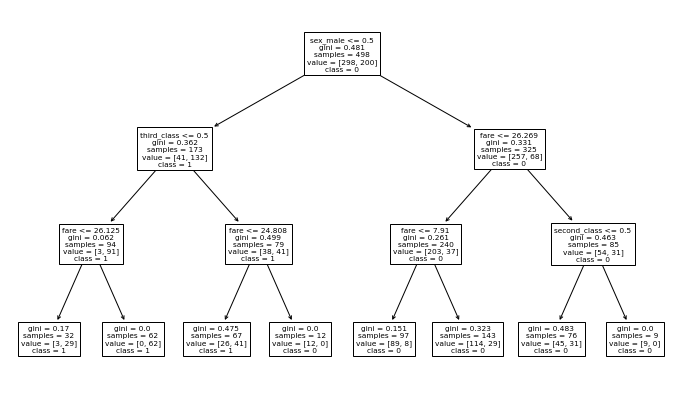

In [46]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [47]:
# Step 3: Use your model to make predictions on the in-sample data
tree.predict(X_train)

array(['0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0',
       '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '0',
       '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '0',
       '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0',
       '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1',
       '1', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1

In [48]:
predictions = tree.predict(X_train)
actual = y_train

In [49]:
# Step 4: Evaluate your predictions
pd.crosstab(actual, predictions)

col_0,0,1
survived,,
0,269,29
1,68,132


In [50]:
confusion_matrix(actual, predictions)

array([[269,  29],
       [ 68, 132]])

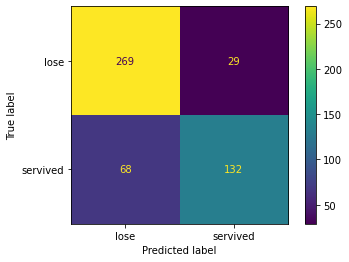

In [51]:
plot_confusion_matrix(tree, X_train, y_train, display_labels=['lose', 'servived'])

In [52]:
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       298
           1       0.82      0.66      0.73       200

    accuracy                           0.81       498
   macro avg       0.81      0.78      0.79       498
weighted avg       0.81      0.81      0.80       498



### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [53]:
# Step 5: Use best n models on out-of-sample data (validate)

predictions = tree.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        81
           1       0.69      0.70      0.70        44

    accuracy                           0.78       125
   macro avg       0.76      0.77      0.76       125
weighted avg       0.79      0.78      0.78       125



In [54]:
# Step 6: Use single best model to make predictions from out-of-sample data (test)

predictions = tree.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       170
           1       0.80      0.69      0.74        98

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



### 5. Run through steps 2-4 using a different max_depth value.

In [55]:
# this time set up max_depth as 10

tree_1 = DecisionTreeClassifier(max_depth = 10)

tree_1.fit(X_train, y_train)

print(export_text(tree_1, feature_names=X_train.columns.tolist()))

|--- sex_male <= 0.50
|   |--- third_class <= 0.50
|   |   |--- fare <= 26.12
|   |   |   |--- fare <= 13.43
|   |   |   |   |--- embark_town_Queenstown <= 0.50
|   |   |   |   |   |--- fare <= 11.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- fare >  11.75
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- embark_town_Queenstown >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- fare >  13.43
|   |   |   |   |--- fare <= 25.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  25.00
|   |   |   |   |   |--- class: 1
|   |   |--- fare >  26.12
|   |   |   |--- class: 1
|   |--- third_class >  0.50
|   |   |--- fare <= 24.81
|   |   |   |--- fare <= 6.99
|   |   |   |   |--- class: 0
|   |   |   |--- fare >  6.99
|   |   |   |   |--- fare <= 7.52
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  7.52
|   |   |   |   |   |--- embark_town_Queenstown <= 0.50
|   |   |   |   |   |   |--- fare <= 23.25
|   |   |   |   |   |   |   |-

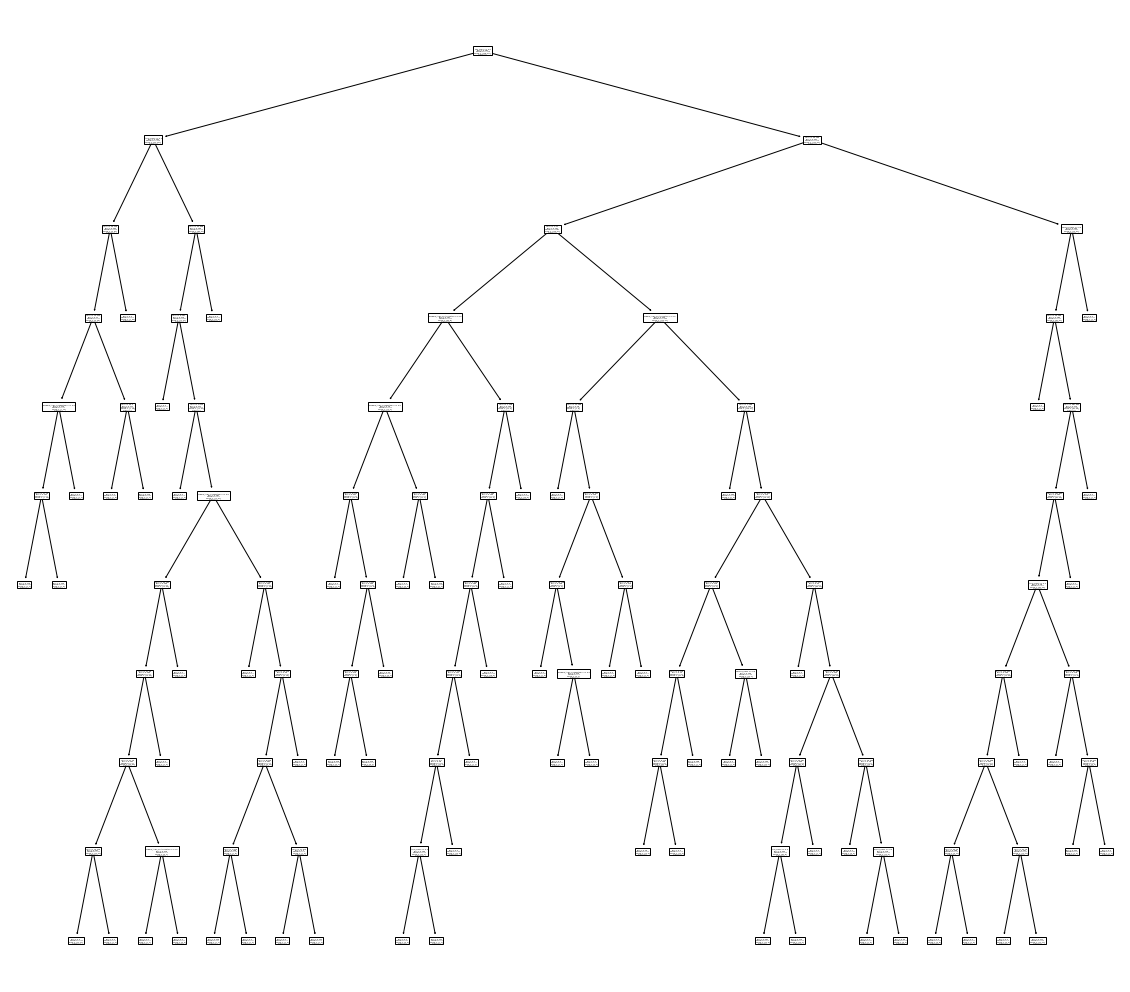

In [56]:
plt.figure(figsize=(20,18))
plot_tree(tree_1, feature_names=X_train.columns, class_names=y_train.unique())
plt.show()

In [57]:
predictions = tree_1.predict(X_train)
actual = y_train

In [58]:
# train

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       298
           1       0.87      0.77      0.81       200

    accuracy                           0.86       498
   macro avg       0.86      0.84      0.85       498
weighted avg       0.86      0.86      0.86       498



In [59]:
# validate

predictions = tree_1.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        81
           1       0.67      0.68      0.67        44

    accuracy                           0.77       125
   macro avg       0.75      0.75      0.75       125
weighted avg       0.77      0.77      0.77       125



In [60]:
# test

predictions = tree_1.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       170
           1       0.79      0.74      0.77        98

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.82       268
weighted avg       0.83      0.84      0.83       268



### 6. Which model performs better on your in-sample data?

* Model 1 : depth = 5 ----------- 81%, 78%, 82%
* Model 2 : depth = 10----------- 86%, 77%, 84%

In [ ]:
# Model 2 performs better on in-sample data

### 7. Which model performs best on your out-of-sample data, the validate set?

In [ ]:
# Model 1 performs better on the validate data

# Review:

In [ ]:
# Finding Optimal max_depth --- Run through steps 2-4 using a different max_depth value.

In [88]:
# Let's get loopy
for i in range(1, 10):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f'Tree with max depth of {i}')
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                    0           1  accuracy   macro avg  weighted avg
precision    0.790769    0.763006  0.781124    0.776888      0.779619
recall       0.862416    0.660000  0.781124    0.761208      0.781124
f1-score     0.825040    0.707775  0.781124    0.766407      0.777946
support    298.000000  200.000000  0.781124  498.000000    498.000000

Tree with max depth of 2
                    0           1  accuracy   macro avg  weighted avg
precision    0.790769    0.763006  0.781124    0.776888      0.779619
recall       0.862416    0.660000  0.781124    0.761208      0.781124
f1-score     0.825040    0.707775  0.781124    0.766407      0.777946
support    298.000000  200.000000  0.781124  498.000000    498.000000

Tree with max depth of 3
                    0           1  accuracy   macro avg  weighted avg
precision    0.798220    0.819876  0.805221    0.809048      0.806917
recall       0.902685    0.660000  0.805221    0.781342      0.805221
f1-score     

In [ ]:
# Which model performs better on your in-sample data?
# ----- Max depth of 15+ produces the highest accuracy

In [89]:
# Which model performs best on your out-of-sample data, the validate set?

# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.781124,0.784,-0.002876
1,2,0.781124,0.784,-0.002876
2,3,0.805221,0.784,0.021221
3,4,0.813253,0.784,0.029253
4,5,0.821285,0.784,0.037285
5,6,0.825301,0.776,0.049301
6,7,0.833333,0.784,0.049333
7,8,0.841365,0.784,0.057365
8,9,0.855422,0.760,0.095422
9,10,0.859438,0.768,0.091438


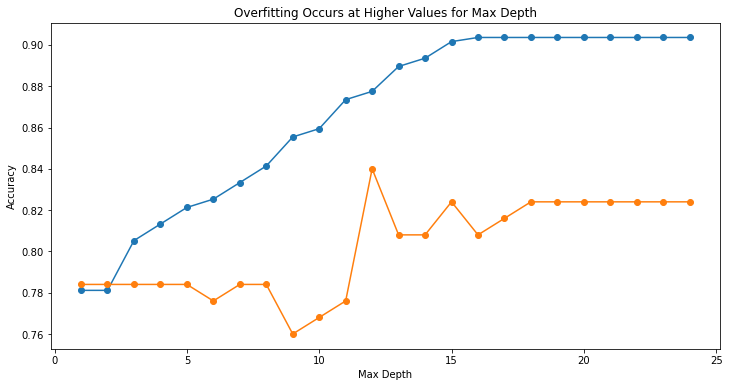

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [91]:
df[df.difference <= 0.10].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,train_accuracy,validate_accuracy,difference
11,12,0.877510,0.840,0.037510
14,15,0.901606,0.824,0.077606
17,18,0.903614,0.824,0.079614
18,19,0.903614,0.824,0.079614
19,20,0.903614,0.824,0.079614
20,21,0.903614,0.824,0.079614
21,22,0.903614,0.824,0.079614
22,23,0.903614,0.824,0.079614
23,24,0.903614,0.824,0.079614
16,17,0.903614,0.816,0.087614


# Random-forest exercise:

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?


In [61]:
from sklearn.ensemble import RandomForestClassifier

### 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

### Train Model

In [66]:
# Create the object -------- Create the Random Forest object with desired hyper-parameters

rf = RandomForestClassifier(max_depth=10, 
                            min_samples_leaf=1,
                            random_state=123)
rf

RandomForestClassifier(max_depth=10, random_state=123)

In [67]:
# Fit the model ------- Fit the random forest algorithm to the training data.

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [68]:
# Feature Importance -----   Evaluate importance, or weight, of each feature.

print(rf.feature_importances_)

[0.02168859 0.09572322 0.35365617 0.01101992 0.02964344 0.48826865]


In [69]:
# Make Predictions --------  Classify each flower by its estimated species.

y_pred = rf.predict(X_train)
y_pred

array(['1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '1', '0',
       '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0',
       '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '1', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '0',
       '0', '1', '0', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0',
       '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0',
       '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '1',
       '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0',
       '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1',
       '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1

In [70]:
# Estimate Probability ------- Estimate the probability of each species, using the training data.

y_pred_proba = rf.predict_proba(X_train)
y_pred_proba

array([[0.48403919, 0.51596081],
       [0.24394678, 0.75605322],
       [0.06333333, 0.93666667],
       [0.84245772, 0.15754228],
       [0.98110091, 0.01889909],
       [0.39533531, 0.60466469],
       [0.75527858, 0.24472142],
       [0.14724775, 0.85275225],
       [0.        , 1.        ],
       [0.67352397, 0.32647603],
       [0.94974385, 0.05025615],
       [0.99846154, 0.00153846],
       [0.99177155, 0.00822845],
       [0.99110091, 0.00889909],
       [0.75527858, 0.24472142],
       [0.69345238, 0.30654762],
       [0.84245772, 0.15754228],
       [0.99325815, 0.00674185],
       [0.78166034, 0.21833966],
       [0.98921248, 0.01078752],
       [0.        , 1.        ],
       [0.02394678, 0.97605322],
       [0.86327692, 0.13672308],
       [0.67352397, 0.32647603],
       [0.04185587, 0.95814413],
       [0.87189087, 0.12810913],
       [0.91539483, 0.08460517],
       [0.64993108, 0.35006892],
       [0.99325815, 0.00674185],
       [0.02394678, 0.97605322],
       [0.

### 2. Evaluate your results using the model score, confusion matrix, and classification report.

### Evaluate Model

In [71]:
# Compute the Accuracy

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.90


In [72]:
# Create a confusion matrix

print(confusion_matrix(y_train, y_pred))

[[281  17]
 [ 34 166]]


**Create a classificaiton report**

**Precision:** $\frac{TP}{(TP + FP)}$

**Recall:** $\frac{TP}{(TP + FN)}$

**F1-Score:** A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.  

F1 $\in [0, 1]$

F1-score = harmonic mean = $\frac{2}{\frac{1}{precision} + \frac{1}{recall}}$

**Support:** number of occurrences of each class. 

In [73]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       298
           1       0.91      0.83      0.87       200

    accuracy                           0.90       498
   macro avg       0.90      0.89      0.89       498
weighted avg       0.90      0.90      0.90       498



### Validate Model

In [74]:
# Evaluate on Out-of-Sample data ------ Compute the accuracy of the model when run on the validate dataset.

print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on test set: 0.78


### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


* predictions = rf.predict(X_train) = y_predictions
* actual = y_train

In [81]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
TN, FP, FN, TP

(269, 29, 68, 132)

In [82]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")
print(y_train.value_counts())

Negative Cases: 298
Positive Cases: 200
0    298
1    200
Name: survived, dtype: int64


In [83]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8052208835341366 

True Positive Rate/Sensitivity/Recall/Power: 0.66 

False Positive Rate/False Alarm Ratio/Fall-out: 0.09731543624161074 

True Negative Rate/Specificity/Selectivity: 0.9026845637583892 

False Negative Rate/Miss Rate: 0.34 

Precision/PPV: 0.8198757763975155 

F1 Score: 0.7313019390581718 

Support (0): 298 

Support (1): 200


### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [ ]:
rf = RandomForestClassifier(max_depth=10, 
                            min_samples_leaf=1,
                            random_state=123)

In [103]:
for i in range(1,10):
    # make the model
    rf = RandomForestClassifier(max_depth=(10-i), 
                            min_samples_leaf=i,
                            random_state=123)
    
    # fit the model (ont the train and only train)
    rf = rf.fit(X_train, y_train)
    
    # use the model
    # We'll evaluate the model's performance on train, first
    y_pred = rf.predict(X_train)
    
    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    
    print(f'Tree with min sample leaf of {i} and max depth with {10-i}')
    print(pd.DataFrame(report))
    print()

Tree with min sample leaf of 1 and max depth with 9
                    0           1  accuracy   macro avg  weighted avg
precision    0.896774    0.893617  0.895582    0.895196      0.895506
recall       0.932886    0.840000  0.895582    0.886443      0.895582
f1-score     0.914474    0.865979  0.895582    0.890227      0.894998
support    298.000000  200.000000  0.895582  498.000000    498.000000

Tree with min sample leaf of 2 and max depth with 8
                    0           1  accuracy   macro avg  weighted avg
precision    0.866044    0.887006  0.873494    0.876525      0.874462
recall       0.932886    0.785000  0.873494    0.858943      0.873494
f1-score     0.898223    0.832891  0.873494    0.865557      0.871985
support    298.000000  200.000000  0.873494  498.000000    498.000000

Tree with min sample leaf of 3 and max depth with 7
                    0           1  accuracy   macro avg  weighted avg
precision    0.842593    0.856322   0.84739    0.849457      0.848106
re

### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
### After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [108]:
# ompare in-sample to out-of-sample

metrics = []

for i in range(1,10):
    rf = RandomForestClassifier(max_depth=(10-i), 
                            min_samples_leaf=i,
                            random_state=123)
    
    rf = rf.fit(X_train, y_train)
    
    in_sample_accuracy = rf.score(X_train, y_train)
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)
    
    output = {"max_depth": (10-i),"min_sample_lead" :i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,min_sample_lead,train_accuracy,validate_accuracy,difference
0,9,1,0.895582,0.792,0.103582
1,8,2,0.873494,0.816,0.057494
2,7,3,0.847390,0.816,0.031390
3,6,4,0.837349,0.824,0.013349
4,5,5,0.817269,0.824,-0.006731
5,4,6,0.815261,0.816,-0.000739
6,3,7,0.807229,0.824,-0.016771
7,2,8,0.777108,0.840,-0.062892
8,1,9,0.775100,0.800,-0.024900


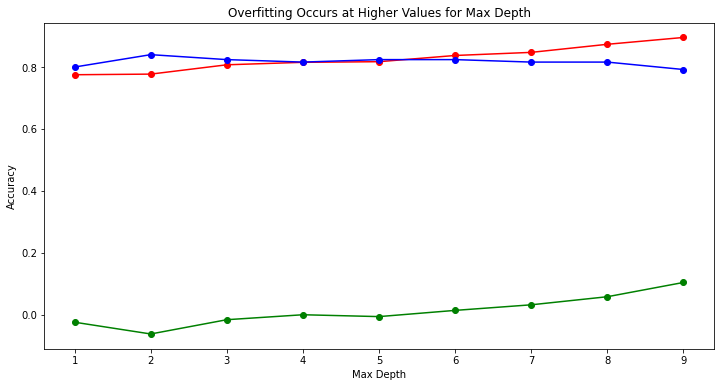

In [180]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, color = 'r', marker = 'o')
plt.plot(df.max_depth, df.validate_accuracy, color = 'b', marker = 'o')
plt.plot(df.max_depth, df.difference, color = 'g', marker = 'o')
plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

In [111]:
df[df.difference <= 0.01].sort_values(by=['validate_accuracy', 'difference'], ascending = [False,True])

,max_depth,min_sample_lead,train_accuracy,validate_accuracy,difference
7,2,8,0.777108,0.840,-0.062892
6,3,7,0.807229,0.824,-0.016771
4,5,5,0.817269,0.824,-0.006731
5,4,6,0.815261,0.816,-0.000739
8,1,9,0.775100,0.800,-0.024900


# KNN exercises

Continue working in your `model.ipynb` file with the titanic dataset.

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 2-4 setting k to 10

5. Run through setps 2-4 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

-------

Once you have completed work on the titanic dataset, try building some knn models with your telco data.

### 1.Fit a K-Nearest Neighbors classifier to your training sample and transform

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from model import map_setosa_knn, train_validate_test_split

# Create KNN Object
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

In [49]:
# Fit the Model to the Training Data
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [50]:
# Make Predictions
y_pred1 = knn1.predict(X_train)
y_pred1[:5]

array(['0', '1', '1', '0', '0'], dtype=object)

In [51]:
y_train[:5]

456    0
8      1
19     1
95     0
86     0
Name: survived, dtype: object

In [52]:
# Estimate Probability
y_pred_proba1 = knn1.predict_proba(X_train)
y_pred_proba1[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

### 2.Evaluate your results using the model score, confusion matrix, and classification report.

### *  Evaluate Model

In [63]:
# Compute the Accuracy

print('Accuracy of KNN(k=1) classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))

Accuracy of KNN(k=1) classifier on training set: 0.89


In [53]:
# Create a Confusion Matrix

print(confusion_matrix(y_train, y_pred1))

[[278  20]
 [ 37 163]]


In [54]:
pd.crosstab(y_train, y_pred1)

col_0,0,1
survived,,
0,278,20
1,37,163


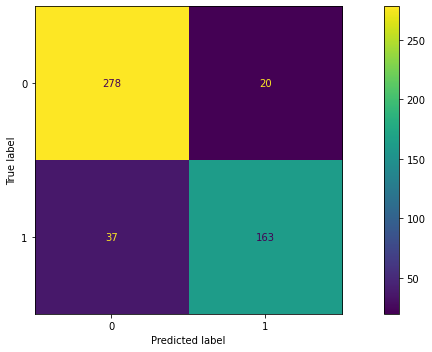

In [55]:
plot_confusion_matrix(knn1, X_train, y_train)

In [56]:
# Create a Classification Report

TN1, FP1, FN1, TP1 = confusion_matrix(y_train, y_pred1).ravel()
TN1, FP1, FN1, TP1

(278, 20, 37, 163)

In [57]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91       298
           1       0.89      0.81      0.85       200

    accuracy                           0.89       498
   macro avg       0.89      0.87      0.88       498
weighted avg       0.89      0.89      0.88       498



### 3.Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [58]:
ALL1 = TP1 + FP1 + FN1 + TN1

accuracy = (TP1 + TN1)/ALL1
true_positive_rate = sensitivity = recall = power = TP1/(TP1+FN1)
false_positive_rate = false_alarm_ratio = fallout = FP1/(FP1+TN1)
true_negative_rate = specificity = selectivity = TN1/(TN1+FP1)
false_negative_rate = miss_rate = FN1/(FN1+TP1)
precision = PPV = TP1/(TP1+FP1)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP1 + FN1
support_neg = FP1 + TN1

print(f"Accuracy: {accuracy}", '\n')
print(f"True Positive Rate/Sensitivity/Recall/Power: {true_positive_rate}", '\n')
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {false_positive_rate}", '\n')
print(f"True Negative Rate/Specificity/Selectivity: {true_negative_rate}", '\n')
print(f"False Negative Rate/Miss Rate: {false_negative_rate}", '\n')
print(f"Precision/PPV: {precision}", '\n')
print(f"F1 Score: {f1_score}", '\n')
print(f"Support (0): {support_neg}", '\n')
print(f"Support (1): {support_pos}")

Accuracy: 0.8855421686746988 

True Positive Rate/Sensitivity/Recall/Power: 0.815 

False Positive Rate/False Alarm Ratio/Fall-out: 0.06711409395973154 

True Negative Rate/Specificity/Selectivity: 0.9328859060402684 

False Negative Rate/Miss Rate: 0.185 

Precision/PPV: 0.8907103825136612 

F1 Score: 0.8511749347258486 

Support (0): 298 

Support (1): 200


### 4.Run through steps 2-4 setting k to 10

In [64]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

knn10.fit(X_train, y_train)

y_pred10 = knn10.predict(X_train)

y_pred_proba10 = knn10.predict_proba(X_train)

print('Accuracy of KNN (k=10) classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

Accuracy of KNN (k=10) classifier on training set: 0.77


### 5.Run through setps 2-4 setting k to 20

In [65]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

knn20.fit(X_train, y_train)

y_pred20 = knn20.predict(X_train)

y_pred_proba20 = knn20.predict_proba(X_train)

print('Accuracy of KNN (k=20) classifier on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

Accuracy of KNN (k=20) classifier on training set: 0.71


### 6.What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [66]:
print('Accuracy of KNN (k=1) classifier on training set: {:.2f}'
     .format(knn1.score(X_train, y_train)))
print('Accuracy of KNN (k=10) classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))
print('Accuracy of KNN (k=20) classifier on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

Accuracy of KNN (k=1) classifier on training set: 0.89
Accuracy of KNN (k=10) classifier on training set: 0.77
Accuracy of KNN (k=20) classifier on training set: 0.71


In [ ]:
# K = 1 performs better

### 7. Which model performs best on our out-of-sample data from validate?

In [67]:
# validate
print('Accuracy of KNN (k=1) classifier on validate set: {:.2f}'
     .format(knn1.score(X_validate, y_validate)))

print('Accuracy of KNN (k=10) classifier on validate set: {:.2f}'
     .format(knn10.score(X_validate, y_validate)))

print('Accuracy of KNN (k=20) classifier on validate set: {:.2f}'
     .format(knn20.score(X_validate, y_validate)))

Accuracy of KNN (k=1) classifier on validate set: 0.75
Accuracy of KNN (k=10) classifier on validate set: 0.75
Accuracy of KNN (k=20) classifier on validate set: 0.72


In [68]:
# test
print('Accuracy of KNN (k=1) classifier on validate set: {:.2f}'
     .format(knn1.score(X_test, y_test)))

print('Accuracy of KNN (k=10) classifier on validate set: {:.2f}'
     .format(knn10.score(X_test, y_test)))

print('Accuracy of KNN (k=20) classifier on validate set: {:.2f}'
     .format(knn20.score(X_test, y_test)))

Accuracy of KNN (k=1) classifier on validate set: 0.77
Accuracy of KNN (k=10) classifier on validate set: 0.80
Accuracy of KNN (k=20) classifier on validate set: 0.73


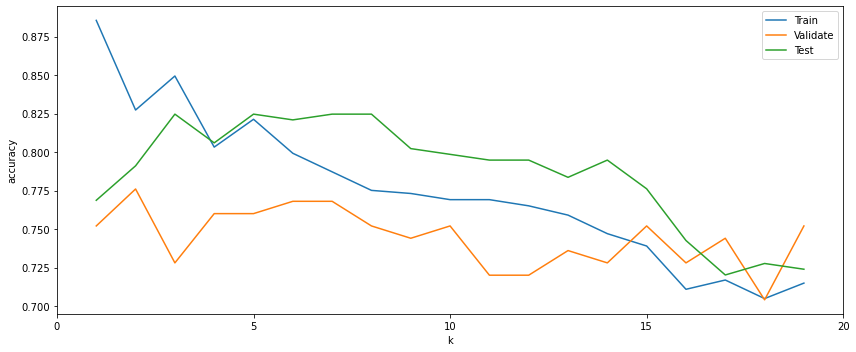

In [73]:
k_range = range(1, 20)
train_scores = []
validate_scores = []
test_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    validate_scores.append(knn.score(X_validate, y_validate))
    test_scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_range, train_scores, label='Train')
plt.plot(k_range, validate_scores, label='Validate')
plt.plot(k_range, test_scores, label='Test')
plt.legend()
plt.xticks([0,5,10,15,20])
plt.show()